In [1]:
import numpy as np
# from nibabel.testing import data_path
import matplotlib.image as mpimg
%matplotlib inline
import matplotlib.pyplot as plt

import SimpleITK as sitk
import nibabel as nib

In [8]:
img_num = 949


# img_num = str(img_num)
# img = nib.load("/Users/Alto/Desktop/Project/Brats_Dataset/HGG/brats_tcia_pat105_1/VSD.Brain.XX.O.MR_T2.35534/VSD.Brain.XX.O.MR_T2.35534.mha")
# img_data1 = img.get_data()

img2 = nib.load("/Users/Alto/Desktop/Project/output_brainweb/t2_orig/"+str(img_num)+".mnc")
img_data2 = img2.get_data()

# print(img_data1.shape)
print(img_data2.shape)

(1, 217, 181)


In [11]:
img_num = 5000


img_num = str(img_num)
img = nib.load("/Users/Alto/Desktop/Project/output_brainweb/t1_orig/"+img_num+".mnc")
img_data1 = img.get_data()

img2 = nib.load("/Users/Alto/Desktop/Project/output_brainweb/t2_orig/"+img_num+".mnc")
img_data2 = img2.get_data()

print(img_data1.shape)
print(img_data2.shape)

(36, 1, 181)
(36, 1, 181)


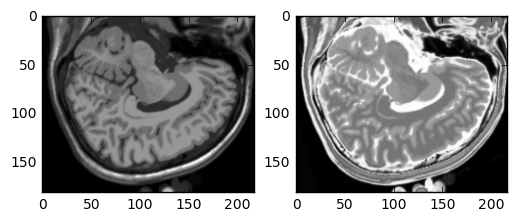

In [10]:
fig, axes = plt.subplots(1,2)

axes[0].imshow(img_data1[0,:,:], cmap="gray")
axes[1].imshow(img_data2[0,:,:], cmap="gray")

# axes[0].imshow(img_data1[:,0,:], cmap="gray")
# axes[1].imshow(img_data2[:,0,:], cmap="gray")

axes[0].imshow(img_data1[:,:,0], cmap="gray")
axes[1].imshow(img_data2[:,:,0], cmap="gray")

In [163]:
# Save slices to file

from PIL import Image
I = img_data1[0,:,:]
I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

img = Image.fromarray(I8)
img.save("/Users/Alto/Desktop/saved_minc1.png")

I = img_data2[0,:,:]
I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

img = Image.fromarray(I8)
img.save("/Users/Alto/Desktop/saved_minc2.png")

In [250]:
# Save slices to file

from PIL import Image
I = img_data1[:,0,:]
I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

img = Image.fromarray(I8)
img.save("/Users/Alto/Desktop/saved_minc1.png")

I = img_data2[:,0,:]
I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

img = Image.fromarray(I8)
img.save("/Users/Alto/Desktop/saved_minc2.png")

In [229]:
I = img_data1[:,0,:]

In [231]:
I.max()

76.806071042263227

## Script to convert MINCs to PNGs

In [12]:
%%time
from PIL import Image
import os
import nibabel as nib

PATH = "/Users/Alto/Desktop/Project/output_brainweb/t1_orig/"
SAVE_PATH = "/Users/Alto/Desktop/Project/output_brainweb/t1_png/"

# Check if output folder exist
if not os.path.isdir(SAVE_PATH):
    print("Creating dir {}".format(os.path.abspath(SAVE_PATH)))
    os.mkdir(SAVE_PATH)
else:
    print("folder {} exists".format((SAVE_PATH)))
    
for image in os.listdir(PATH):
    if image.endswith(".mnc"):
        img = nib.load(PATH+image)
        img_data = img.get_data()

        # check not just all black images and have minimum dimension greater than or equal 180 px
        if (img_data.max() > 25 and np.sort(img_data.shape)[1] >= 180):
            
            # Check which axis to ignore
            img_shape = img_data.shape
            if(img_shape[0] == 1):
                I = img_data[0,:,:]
            elif(img_shape[1] == 1):
                I = img_data[:,0,:]
            else:
                I = img_data[:,:,0]

            I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)
            
            img = Image.fromarray(I8)
            img.save(SAVE_PATH+image+".png")
        

Creating dir /Users/Alto/Desktop/Project/output_brainweb/t1_png
CPU times: user 51.5 s, sys: 2.64 s, total: 54.2 s
Wall time: 1min


### Read all files existing in t1 and produce corresponding t2 (png)

In [29]:
%%time
from PIL import Image
import os
import nibabel as nib

PATH_T1_PNG = "/Users/Alto/Desktop/Project/output_brainweb/t1_png/"
PATH_T2 = "/Users/Alto/Desktop/Project/output_brainweb/t2_orig/"
SAVE_PATH = "/Users/Alto/Desktop/Project/output_brainweb/t2_png/"

# Check if output folder exist
if not os.path.isdir(SAVE_PATH):
    print("Creating dir {}".format(os.path.abspath(SAVE_PATH)))
    os.mkdir(SAVE_PATH)
else:
    print("folder {} exists".format((SAVE_PATH)))

for image in os.listdir(PATH_T1_PNG):

    if image.endswith(".png"):
        img_path = PATH_T2+image[:-4] # -4 to select only .mnc extension without .png
        img = nib.load(img_path)
        img_data = img.get_data()
            
        # Check which axis to ignore
        img_shape = img_data.shape
        if(img_shape[0] == 1):
            I = img_data[0,:,:]
        elif(img_shape[1] == 1):
            I = img_data[:,0,:]
        else:
            I = img_data[:,:,0]

        I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

        img = Image.fromarray(I8)
        img.save(SAVE_PATH+image[:-4]+".png")
        

Creating dir /Users/Alto/Desktop/Project/output_brainweb/t2_png
CPU times: user 39.5 s, sys: 1.9 s, total: 41.4 s
Wall time: 41.7 s


In [14]:
%%time
from PIL import Image
import os
import nibabel as nib

PATH = "/Users/Alto/Desktop/Project/output_brainweb/t2_orig/"
SAVE_PATH = "/Users/Alto/Desktop/Project/output_brainweb/t2_png/"

# Check if output folder exist
if not os.path.isdir(SAVE_PATH):
    print("Creating dir {}".format(os.path.abspath(SAVE_PATH)))
    os.mkdir(SAVE_PATH)
else:
    print("folder {} exists".format((SAVE_PATH)))

for image in os.listdir(PATH):
    if image.endswith(".mnc"):
        img = nib.load(PATH+image)
        img_data = img.get_data()
        
        
        
        # check not just all black images and have minimum dimension greater than or equal 180 px
        if (img_data.max() > 25 and np.sort(img_data.shape)[1] >= 180):
            
            # Check which axis to ignore
            img_shape = img_data.shape
            if(img_shape[0] == 1):
                I = img_data[0,:,:]
            elif(img_shape[1] == 1):
                I = img_data[:,0,:]
            else:
                I = img_data[:,:,0]

            I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)
            
            img = Image.fromarray(I8)
            img.save(SAVE_PATH+image+".png")
        

Creating dir /Users/Alto/Desktop/Project/output_brainweb/t2_png
CPU times: user 48.5 s, sys: 2.23 s, total: 50.8 s
Wall time: 51.3 s




## Split data into train, validate, test sets

In [53]:
import random
import math

PATH_T1_PNG = "/Users/Alto/Desktop/Project/output_brainweb/t1_png/"
img_t1_list = os.listdir(PATH_T1_PNG)

# get all image with file name that ends in .png
img_t1_list = [img for img in img_t1_list if img.endswith(".png")]

# shuffle image list
random.shuffle(img_t1_list)

# Get index to slice image list
total_images = len(img_t1_list)
train_80 = math.floor(total_images/100*80)
validate_10 = train_80 + math.floor(total_images/100*10)
test_10 = validate_10 + math.floor(total_images/100*10)
train_80, validate_10,test_10

img_train_list = img_t1_list[:train_80]
img_validate_list = img_t1_list[train_80:validate_10]
img_test_list = img_t1_list[validate_10:test_10]

In [77]:
""" 
FOR T1 IMAGES
"""

SAVE_PATH = "/Users/Alto/Desktop/Project/output_brainweb/t1/"

# Check if output folder exist
if not os.path.isdir(SAVE_PATH):
    print("Creating dir {}".format(os.path.abspath(SAVE_PATH)))
    os.mkdir(SAVE_PATH)
    os.mkdir(SAVE_PATH+"train/")
    os.mkdir(SAVE_PATH+"validate/")
    os.mkdir(SAVE_PATH+"test/")
else:
    print("folder {} exists".format((SAVE_PATH)))


import shutil

PATH_T1_PNG = "/Users/Alto/Desktop/Project/output_brainweb/t1_png/"

for img in img_train_list:
    srcfile = PATH_T1_PNG+img
    dstdir = SAVE_PATH+"train/"
    shutil.copy(srcfile, dstdir)

for img in img_validate_list:
    srcfile = PATH_T1_PNG+img
    dstdir = SAVE_PATH+"validate/"
    shutil.copy(srcfile, dstdir)

for img in img_test_list:
    srcfile = PATH_T1_PNG+img
    dstdir = SAVE_PATH+"test/"
    shutil.copy(srcfile, dstdir)

Creating dir /Users/Alto/Desktop/Project/output_brainweb/t1


In [79]:
""" 
FOR T1 IMAGES
"""

SAVE_PATH = "/Users/Alto/Desktop/Project/output_brainweb/t2/"

# Check if output folder exist
if not os.path.isdir(SAVE_PATH):
    print("Creating dir {}".format(os.path.abspath(SAVE_PATH)))
    os.mkdir(SAVE_PATH)
    os.mkdir(SAVE_PATH+"train/")
    os.mkdir(SAVE_PATH+"validate/")
    os.mkdir(SAVE_PATH+"test/")
else:
    print("folder {} exists".format((SAVE_PATH)))


import shutil

PATH_T2_PNG = "/Users/Alto/Desktop/Project/output_brainweb/t2_png/"

for img in img_train_list:
    srcfile = PATH_T2_PNG+img
    dstdir = SAVE_PATH+"train/"
    shutil.copy(srcfile, dstdir)

for img in img_validate_list:
    srcfile = PATH_T2_PNG+img
    dstdir = SAVE_PATH+"validate/"
    shutil.copy(srcfile, dstdir)

for img in img_test_list:
    srcfile = PATH_T2_PNG+img
    dstdir = SAVE_PATH+"test/"
    shutil.copy(srcfile, dstdir)

Creating dir /Users/Alto/Desktop/Project/output_brainweb/t2






## Plot Loss Curve from csv file

In [50]:
import pandas as pd
loss_data = pd.read_csv("/Users/Alto/Desktop/chainer-fast-neuralstyle-master/new_model/f1_s3/loss.csv")

In [57]:
rows = loss_data.values
iteration = []
loss = []
for row in rows:
#     if row[3] < 100000:
    iteration.append(row[0])
    loss.append(row[3])

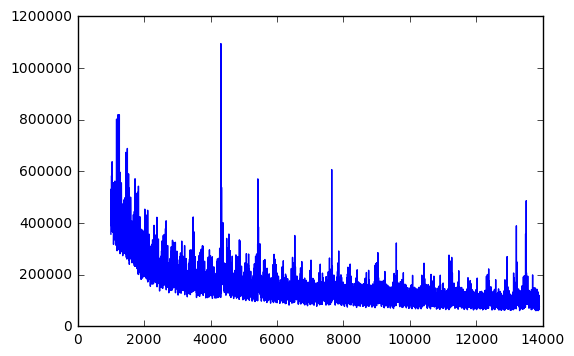

In [59]:
ignore_n_iter = 1000
plt.plot(iteration[ignore_n_iter:],loss[ignore_n_iter:])

plt.show()

## Generate corresponding T1 and T2

In [48]:
import os
import shutil

# model_path = "/Users/Alto/Desktop/chainer-fast-neuralstyle-master/new_model/f1_s3/2216.mnc.model"
# output_path = "/Users/Alto/Desktop/chainer-fast-neuralstyle-master/new_model/f1_s3/"

model_path = "/Users/Alto/Desktop/chainer-fast-neuralstyle-master/new_model/f1_s3_repeat/2216.mnc.model"
output_path = "/Users/Alto/Desktop/chainer-fast-neuralstyle-master/new_model/f1_s3_repeat/"

t1_path = "/Users/Alto/Desktop/Project/output_brainweb/t1/validate/"
t2_path = "/Users/Alto/Desktop/Project/output_brainweb/t2/validate/"

t1_list = ['0', '19', '43', '506', '4641']
t2_list = []

In [49]:
%%time
# Execute generate.py
for img_name in t1_list:
    
    command_path = "/Users/Alto/Desktop/chainer-fast-neuralstyle-master/"
    command = "python " + command_path + "generate.py " + t1_path + img_name + ".mnc.png -m " + model_path + " -o " + output_path + img_name +"_gen.png"
    os.system(command)
#     print(command)
    
    srcfile = t1_path+img_name+".mnc.png"
    dstdir = output_path+img_name+"_t1.mnc.png"
    shutil.copy(srcfile, dstdir)
    
    srcfile = t2_path+img_name+".mnc.png"
    dstdir = output_path+img_name+"_t2.mnc.png"
    shutil.copy(srcfile, dstdir)
    
    print("Finish processing image " + img_name)

Finish processing image 0
Finish processing image 19
Finish processing image 43
Finish processing image 506
Finish processing image 4641
CPU times: user 6.76 ms, sys: 7.31 ms, total: 14.1 ms
Wall time: 15 s


In [45]:
def count_nonblack_np(img):
    """Return the number of pixels in img that are not black.
    img must be a Numpy array with colour values along the last axis.

    """
#     total_dim = img.shape[0]*img.shape[1]*img.shape[2]
#     return (img.any(axis=-1).sum()/total_dim)*100

    black_thresh = 10
    nblack = 0
    for pixel in img:
        if pixel < black_thresh:
            nblack += 1
    n = len(pixels)
    
    print((nblack / float(n)))
#     if (nblack / float(n)) > 0.5:
#         print("mostly black")

KeyboardInterrupt: 

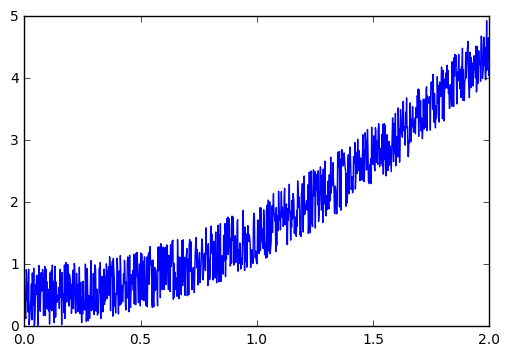

In [1]:
import pylab as plt
import numpy as np

X = np.linspace(0,2,1000)
Y = X**2 + np.random.random(X.shape)

plt.ion()
graph = plt.plot(X,Y)[0]

while True:
    Y = X**2 + np.random.random(X.shape)
    graph.set_ydata(Y)
    plt.draw()

In [14]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

# Ultrasound slices
slice_0 = img_data1[186, :, :]
slice_1 = img_data1[:, 233, :]
slice_2 = img_data1[:, :, 200]
show_slices([slice_0, slice_1, slice_2]) 

IndexError: index 186 is out of bounds for axis 0 with size 181

In [4]:
slice_0.ndim

2

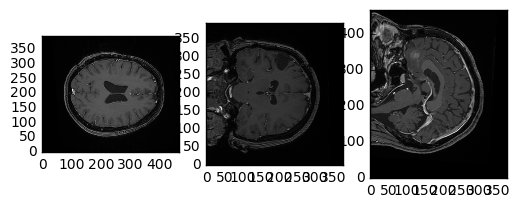

In [29]:
# MRI Slices
slice_0 = img_data2[186, :, :]
slice_1 = img_data2[:, 233, :]
slice_2 = img_data2[:, :, 200]
show_slices([slice_0, slice_1, slice_2]) 

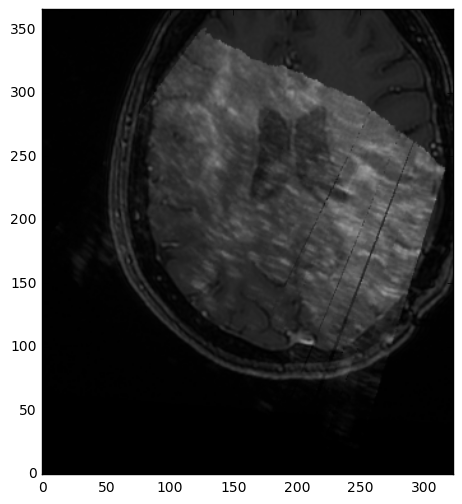

In [7]:
# Overlay US over MRI
slice_0 = img_data2[186, :, :]
slice_1 = img_data2[:, 233, :]
slice_2 = img_data2[:, :, 200]
slice_00 = img_data1[186, :, :]
plt.figure(figsize=(6,6))
imgplot = plt.imshow(slice_0, cmap="gray", origin="lower")
plt.imshow(slice_00, cmap='gray', alpha=0.5,origin="lower")

In [36]:
# Save slices to file

from PIL import Image
I = slice_00
I8 = (((I - I.min()) / (I.max() - I.min())) * 255.9).astype(np.uint8)

img = Image.fromarray(I8)
img.save("style.png")

In [20]:
import numpy as np
black = np.zeros([10,10,3],dtype=np.uint8)

white = np.zeros([10,10,3],dtype=np.uint8)
white.fill(255) # or img[:] = 255

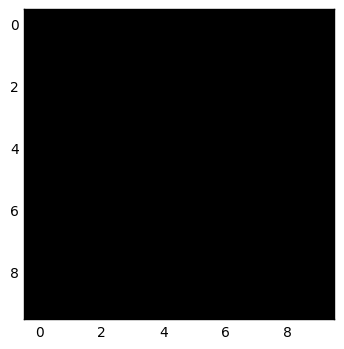

In [21]:
# fig, axes = plt.subplots(1,2)

plt.imshow(black)

In [30]:
white[:,:,2]

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

In [54]:
import math
def mse(imageA, imageB):
    # err = math.sqrt(np.sum((imageA.astype("float") - imageB.astype("float")) ** 2))
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
# err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [58]:
mse(white,black)/(10*10*3)

65025.0

In [47]:
math.sqrt(10*10*3*(255**2))

4416.729559300637

In [36]:
white.shape[0] * black.shape[1]

NameError: name 'imageA' is not defined

In [85]:
abc = ""
j = "models/"
print(j+abc+"test")

models/test
